In [2]:
# importing libraries

import numpy as np
import pandas as pd

# Get the Data

In [3]:
# get the data

url = 'https://raw.githubusercontent.com/styles3544/handson-ml2/master/datasets/housing/housing.csv'
df = pd.read_csv(url)

In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# Quick Analysis of Data

In [5]:
# quick info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


All the attributes are numerical except the ocean_proximity which is an object. 

Total instances: 20640

Null values in total_bedrooms

In [6]:
# unique categories present in ocean_proximity column
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
# summary of numerical attributes
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f947ed6ae50>,
      dtype=object)

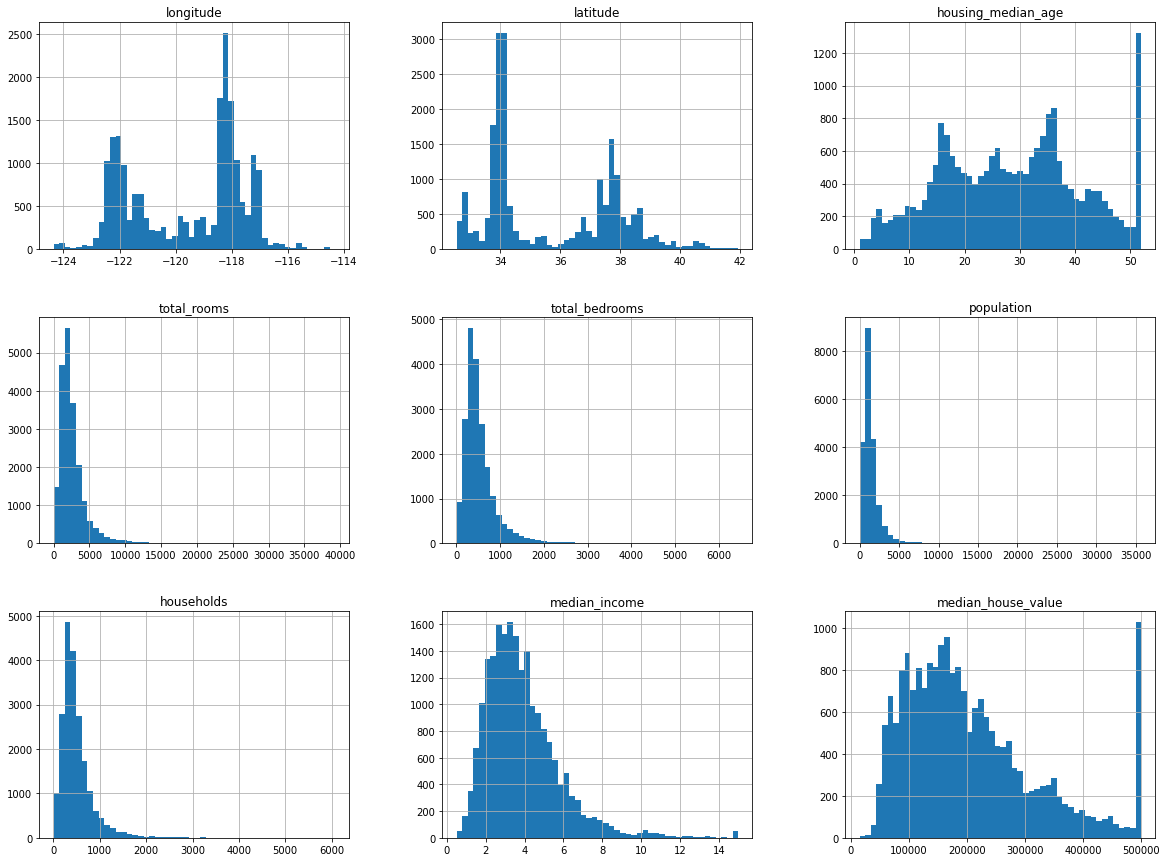

In [8]:
# plotting histogram for each numerical attribute to get more from the data

import matplotlib.pyplot as plt
%matplotlib inline

df.hist(bins=50, figsize=(20,15))

# Create a Test Set

We are considering random sampling here. It is fine on large dataset but on small dataset, this sampling method may lead to biased results. 

For example, when a survey company decides to call 1000 people to ask them questions, they don't just pick 1000 people randomly from a phone book. 

They try to make sure that those 1000 people will represent the entire population. This is called *stratified sampling.*

In [9]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=40)

In [10]:
# deriving income category as it should represent the various categories of income in the whole dataset

df['income_category'] = pd.cut(df['median_income'], 
                               bins=[0, 1.5, 3, 4.5, 6, np.inf], 
                               labels=['less than 15000', '15000-30000', '30000-45000', '45000-60000', 'more than 60000'])

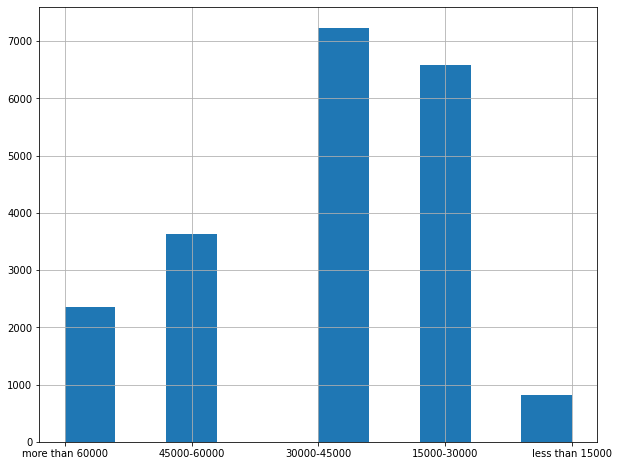

In [11]:
# plotting above data

df['income_category'].hist(figsize=(10,8))

In [12]:
df['median_income'].value_counts()

3.1250     49
15.0001    49
2.8750     46
4.1250     44
2.6250     44
           ..
4.1514      1
1.2614      1
2.0294      1
6.7079      1
3.7306      1
Name: median_income, Length: 12928, dtype: int64

In [13]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_category
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,more than 60000
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,more than 60000
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,more than 60000
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,45000-60000
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,30000-45000


In [14]:
# doing stratified splitting to represent all category of median_income

strat_X_train, strat_X_test, strat_y_train, strat_y_test = train_test_split(df, df, test_size=0.2, random_state=43, stratify=df['income_category'])

In [15]:
strat_y_test['income_category'].value_counts()/len(strat_y_test)

30000-45000        0.350533
15000-30000        0.318798
45000-60000        0.176357
more than 60000    0.114341
less than 15000    0.039971
Name: income_category, dtype: float64

In [16]:
strat_X_train['income_category'].value_counts()/len(strat_X_train)

30000-45000        0.350594
15000-30000        0.318859
45000-60000        0.176296
more than 60000    0.114462
less than 15000    0.039789
Name: income_category, dtype: float64

As you can see that our training set and test sets are splited in equal proportions of income_category

In [17]:
# now we should remove the income category column from our data to revert the data back to its original form

for strat_set in (strat_X_train, strat_X_test, strat_y_train, strat_y_test):
  strat_set.drop(['income_category'], axis=1, inplace=True)

In [18]:
strat_X_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
8032,-118.13,33.83,44.0,1710.0,333.0,786.0,344.0,4.2917,314700.0,<1H OCEAN
16031,-122.45,37.72,46.0,1406.0,235.0,771.0,239.0,4.7143,219300.0,NEAR BAY
4108,-118.37,34.13,28.0,4287.0,627.0,1498.0,615.0,8.5677,500001.0,<1H OCEAN
13593,-117.28,34.11,39.0,1573.0,418.0,1258.0,359.0,1.4896,69500.0,INLAND
1100,-121.75,39.88,16.0,2867.0,559.0,1203.0,449.0,2.7143,95300.0,INLAND


In [19]:
strat_y_test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
19132,-122.70,38.23,47.0,2090.0,387.0,1053.0,377.0,3.5673,310300.0,<1H OCEAN
20203,-119.20,34.25,18.0,3208.0,643.0,1973.0,614.0,3.8162,235000.0,NEAR OCEAN
13234,-117.66,34.14,8.0,1692.0,253.0,857.0,251.0,6.9418,310500.0,INLAND
5894,-118.32,34.16,49.0,1074.0,170.0,403.0,208.0,6.2547,366700.0,<1H OCEAN
4253,-118.35,34.10,18.0,7432.0,2793.0,3596.0,2270.0,2.8036,225000.0,<1H OCEAN


# Discover and Visualize the Data to Gain Insights

In [20]:
# making a copy so that we don't transform training data

housing = strat_X_train.copy()

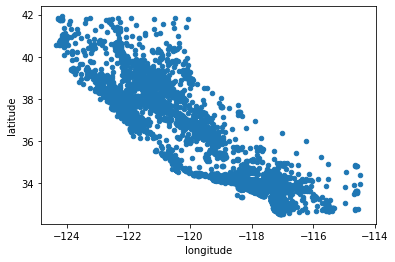

In [21]:
# plotting geographical information on scatter plot ---> latitute and longitude

housing.plot(kind='scatter', x='longitude', y='latitude')

Above plot doesn't give any information so we will use alpha=0.1 parameter to see the regions where density of the data points is high

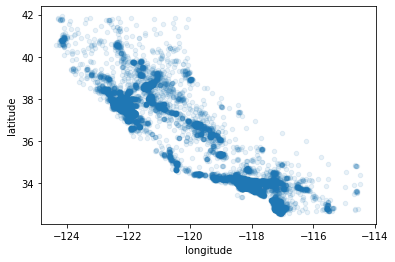

In [22]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)

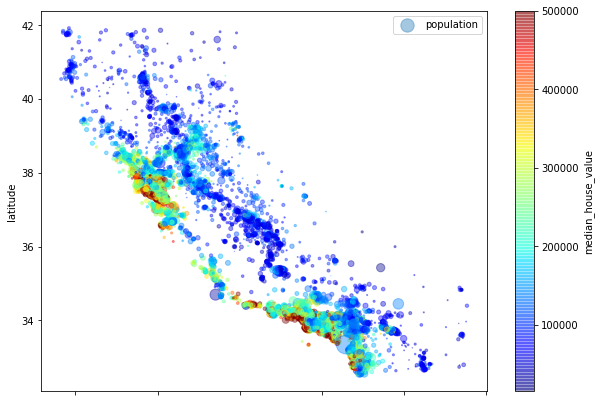

In [23]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
             c='median_house_value', cmap=plt.get_cmap("jet"), colorbar=True,
             s=housing['population']/100, label='population',
             figsize=(10,7));
plt.legend();

1. As we can see that housing prices depends on the proximity to the ocean and the population density. But in the upper half of the plot the ocean proximity might not be best to describe the prices of house.

2. We can use clustering to find the main clusters and add a feature proximity_from_cluster_center to the dataset. Although, this might not be useful for upper part of the diagram or the North part.

In [24]:
# we can see the correlation of various features with the median housing price

corr_matrix = housing.corr()

# seeing how much each attribute correlates with the median house value
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.691068
total_rooms           0.138526
housing_median_age    0.102086
households            0.068405
total_bedrooms        0.052128
population           -0.021388
longitude            -0.043072
latitude             -0.146273
Name: median_house_value, dtype: float64

### Observations to make:

1. Values range from -1 to 1
2. median house value tends to go up when the median income goes up (strong positive correlation)
3. prices have tendency to go down when you go north (negative correlation between latitude and median)

Note: The correlation coefficient only measures linear correlations ("if x goes up, then y generally goes up/down"). It may completely miss uot on non-linaer relationship.

In [25]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [26]:
num_cols = [col for col in list(housing.columns)
            if housing[col].dtype == 'float64']

In [27]:
num_cols

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value']

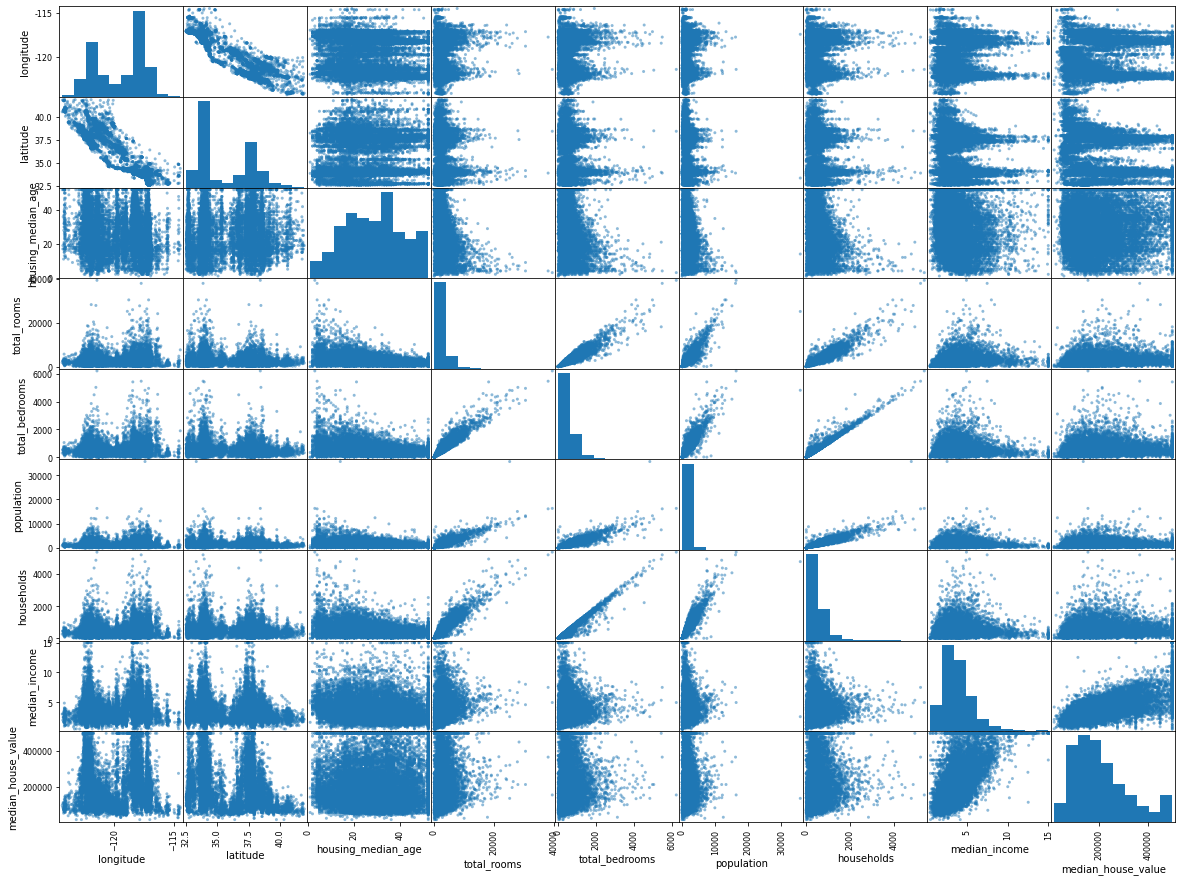

In [28]:
# plotting correlation among attributes using pandas
from pandas.plotting import scatter_matrix

scatter_matrix(housing[num_cols], figsize=(20,15));

Above scatter matrix plots every numerical attribute against every numerical attribute, plus a histogram of each numerical attribute.

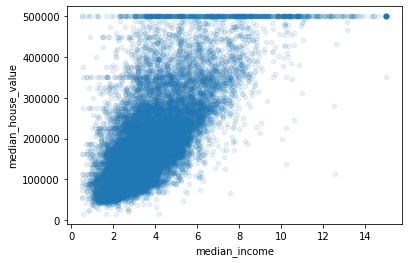

In [29]:
# plotting median_income against median_house_value

housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.1)

We can clearly see the price cap clearly visible as a line at 500000 and it also reveals some other lines below it. One at around 450000 and at around 350000 and maybe two between 200000 to 300000.

We might wnat to remove these data points in order to avoid our model learning those trends. 

Moreover, we can clearly see the correlation between the two variables is very strong. The trend is increasing and the data points are also not very dispersed.

Up till now we observed the following:

1. Identified few data quirks that we may want to clean up before feeding the data to ML algorithm.
2. Found correlation between attributes with respect to the target.
3. Noticed that some attributes have a tail heavy distribution which might need to be transformed.

# Combining Attributes and Experimentation

Try out various attribute combinations.

In [30]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [31]:
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']

In [32]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
8032,-118.13,33.83,44.0,1710.0,333.0,786.0,344.0,4.2917,314700.0,<1H OCEAN,4.970930,0.194737,2.284884
16031,-122.45,37.72,46.0,1406.0,235.0,771.0,239.0,4.7143,219300.0,NEAR BAY,5.882845,0.167141,3.225941
4108,-118.37,34.13,28.0,4287.0,627.0,1498.0,615.0,8.5677,500001.0,<1H OCEAN,6.970732,0.146256,2.435772
13593,-117.28,34.11,39.0,1573.0,418.0,1258.0,359.0,1.4896,69500.0,INLAND,4.381616,0.265734,3.504178
1100,-121.75,39.88,16.0,2867.0,559.0,1203.0,449.0,2.7143,95300.0,INLAND,6.385301,0.194977,2.679287


In [33]:
corr_mat = housing.corr()

corr_mat['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.691068
rooms_per_household         0.181512
total_rooms                 0.138526
housing_median_age          0.102086
households                  0.068405
total_bedrooms              0.052128
population                 -0.021388
population_per_household   -0.022279
longitude                  -0.043072
latitude                   -0.146273
bedrooms_per_room          -0.258447
Name: median_house_value, dtype: float64

bedrooms_per_room is much more correlated with median_house_value than total_rooms or total_bedrooms. 

Houses with lower bedroom/room ration is expected to be more expensive.

Also, rooms_per_household is more informative than total_rooms having positive correlation which is obvious

# Prepare the Data for Machine Learning Algorithm

Make a clean training set by copying strat_X_train once again. We also need to drop the predictor and target variables. We can do this by drop() as it creates the copy of the original without disturbing the original dataset.

In [34]:
housing = strat_X_train.drop('median_house_value', axis=1)
housing_labels = strat_X_train['median_house_value'].copy()

# Data Cleaning

We have three ways to do this:

1. Dropping all rows with null values
2. Dropping all columns with null values
3. Imputations

In [35]:
housing.isnull().sum() 

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        172
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

In [36]:
# using sklearn to impute median values
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

num_colms = [col for col in list(housing.columns)
            if housing[col].dtype == 'float64']

num_colms

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [37]:
imputed = imputer.fit_transform(housing[num_colms])
imputed

array([[-1.1813e+02,  3.3830e+01,  4.4000e+01, ...,  7.8600e+02,
         3.4400e+02,  4.2917e+00],
       [-1.2245e+02,  3.7720e+01,  4.6000e+01, ...,  7.7100e+02,
         2.3900e+02,  4.7143e+00],
       [-1.1837e+02,  3.4130e+01,  2.8000e+01, ...,  1.4980e+03,
         6.1500e+02,  8.5677e+00],
       ...,
       [-1.2132e+02,  3.8630e+01,  2.0000e+01, ...,  3.1070e+03,
         1.3150e+03,  3.0348e+00],
       [-1.1783e+02,  3.4150e+01,  2.0000e+01, ...,  1.0230e+03,
         2.9800e+02,  8.0683e+00],
       [-1.1801e+02,  3.4090e+01,  3.2000e+01, ...,  1.2830e+03,
         4.0400e+02,  3.1944e+00]])

In [38]:
# converting to data frame

housing_tr = pd.DataFrame(
    imputed,
    columns = housing[num_colms].columns,
    index = housing[num_colms].index
)

housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
8032,-118.13,33.83,44.0,1710.0,333.0,786.0,344.0,4.2917
16031,-122.45,37.72,46.0,1406.0,235.0,771.0,239.0,4.7143
4108,-118.37,34.13,28.0,4287.0,627.0,1498.0,615.0,8.5677
13593,-117.28,34.11,39.0,1573.0,418.0,1258.0,359.0,1.4896
1100,-121.75,39.88,16.0,2867.0,559.0,1203.0,449.0,2.7143


In [39]:
housing_tr.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

We don't have any missing values now.

#Handling Text and Categorical Values

In [40]:
housing_cat = housing['ocean_proximity']
housing_cat.head(10)

8032      <1H OCEAN
16031      NEAR BAY
4108      <1H OCEAN
13593        INLAND
1100         INLAND
18953        INLAND
8759     NEAR OCEAN
2282         INLAND
2233         INLAND
15262    NEAR OCEAN
Name: ocean_proximity, dtype: object

In [41]:
# converting category into numbers using ordinal encoder 
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()

housing_cat_encoded = oe.fit_transform(np.array(housing_cat).reshape(-1,1))
housing_cat_encoded[:10]

array([[0.],
       [3.],
       [0.],
       [1.],
       [1.],
       [1.],
       [4.],
       [1.],
       [1.],
       [4.]])

In [42]:
oe.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

This representaion has an issue with the ML algorithm, i.e., ML algorithm will assume two nearby values to be more similar than two distant values. It is fine in the case of ordinal data where order matters but not in this case.

So, we'll do one hot encoding.

In [43]:
# onehot encoding
from sklearn.preprocessing import OneHotEncoder

onehot = OneHotEncoder()

housing_cat_onehot_encoded = onehot.fit_transform(np.array(housing_cat).reshape(-1,1))

In [44]:
housing_cat_onehot_encoded

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [45]:
housing_cat_onehot_encoded.toarray()

array([[1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [46]:
onehot.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

If a categorical attribute has large number of possible categories then one hot encoding will result in large number of input features. This may slow down training or degrade performance. 

If this happens the you many want to replace the categorical attribute with a numerical feature related to the category.

For Example:
ocean_proximity can be replaced with distance_from_ocean

This way, you can replace each category with a learnable, low dimentional vector called an *embedding*.

Each categories representation would be learned during training. This is an example of *representation learning*.

# Transformation Pipelines

In [47]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

numerical_pipeline = Pipeline(
    steps = [
     ('imputer', SimpleImputer(strategy='median')),
    ('scalar', StandardScaler())
    ]
)

In [48]:
# making a pipeline which can handle both numerical and categorical data

from sklearn.compose import ColumnTransformer

cat_colms = ['ocean_proximity']

full_pipeline = ColumnTransformer(
    transformers=[
           ('numpipe', numerical_pipeline, num_colms),
           ('cat', OneHotEncoder(), cat_colms)
    ]
)

In [49]:
housing_transformed = full_pipeline.fit_transform(housing)

In [50]:
housing_transformed

array([[ 0.72296892, -0.84564688,  1.21573919, ...,  0.        ,
         0.        ,  0.        ],
       [-1.4316449 ,  0.97476553,  1.3749774 , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.60326815, -0.70525518, -0.0581665 , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.86805379,  1.40062037, -0.69511935, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.87259488, -0.69589573, -0.69511935, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78281931, -0.72397408,  0.26030992, ...,  0.        ,
         0.        ,  0.        ]])

In [51]:
housing_transformed.shape

(16512, 13)

In [52]:
housing.shape

(16512, 9)

In [53]:
data_tr = pd.DataFrame(
    housing_transformed, 
    index = housing.index
)

# Select and Train a Model

###Training and Evaluating on Training Set

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

reg = LinearRegression()

reg.fit(housing_transformed, housing_labels)

preds = reg.predict(housing_transformed)

lin_mse = mean_squared_error(housing_labels, preds)
lin_rmse = np.sqrt(lin_mse)

lin_rmse

68423.21331810919

Not a great score as mean_housing_value ranges between 120000 to 265000, so prediction erroe of 68423 in not good. 

This is an example of model underfitting the training data.

This can mean that the feature do not provide enough information to make good predictions, or the model is not powerful enough.

This can be solved by:
1. selecting more powerful model
2. feed better training features
3. reduce the constraints on the model

In [55]:
# we should save every model so that we can come back to it later

import joblib

#joblib.dump(reg, "reg_model.pkl")

# later we can load by using ---> joblib.load("reg_model.pkl")

In [56]:
# trying decision tree
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor()

dt_reg.fit(housing_transformed, housing_labels)

tree_preds = dt_reg.predict(housing_transformed)

tree_mse = mean_squared_error(housing_labels, tree_preds)
tree_rmse = np.sqrt(tree_mse)

tree_rmse

0.0

This is a clear example of overfitting on the training data. The tree regressor has badly overfitted itself on data. 

To make sure above, we evaluate decision tree model using cross-validation.

# Better Evaluation Using Cross-Validation

We will split the data into a smaller training set and a validation set, then train our model on small training set and evaluate it on the validation set.

Alternative to above, we can do K-fold cross-validation. In this we randomly split training training set into 10 distinct subsets called folds, then train and evaluate the model 10 times, picking a different fold for evaluation every time and training on the other 9 folds.

The result consists of array having 10 evaluation scores.

In [57]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_reg, housing_transformed, housing_labels, scoring='neg_mean_squared_error', cv=10)

In [58]:
tree_rmse_scores = np.sqrt(-scores)

In [59]:
def display_scores(scores):
  print("Scores: ", scores)
  print("Mean: ", scores.mean())
  print("Standard deviation: ", scores.std())

In [60]:
display_scores(tree_rmse_scores)

Scores:  [71031.79298008 67250.24012972 70704.6010507  71025.7707032
 71160.52527914 68667.39830772 68006.08733069 66079.96490705
 67688.62231723 70089.57080823]
Mean:  69170.45738137637
Standard deviation:  1763.7611372201977


Now we can see that Decision Tree model didn't do actually that well. It even did worse than linear regression model.

In [61]:
# saving dt model

#joblib.dump(dt_reg, "decision_tree_reg_model.pkl")

In [62]:
# trying last model ---> Random Forest
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()

forest_reg.fit(housing_transformed, housing_labels)

forest_preds = forest_reg.predict(housing_transformed)

forest_mse = mean_squared_error(housing_labels, forest_preds)
forest_rmse = np.sqrt(forest_mse)

forest_rmse

18175.154173733696

In [63]:
# doing cross-validation

forest_scores = cross_val_score(forest_reg ,housing_transformed, housing_labels,
                                scoring='neg_mean_squared_error',
                                cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)

In [64]:
display_scores(forest_rmse_scores)

Scores:  [50999.08275972 48680.10166331 49212.61255093 48800.12448082
 48193.62916323 50187.14221101 45646.74161486 48421.53480168
 47894.28559274 50450.44975909]
Mean:  48848.57045973879
Standard deviation:  1446.354910876353


Random Forest model did even better tha Decision Tree model. 

We can try more models like SVM with different kernels and all. But let's first save the model.

In [65]:
# saving random forest model

#joblib.dump(forest_reg, "rand_forst_reg_model.pkl")

# Fine Tune Model

### Grid Search 

Choosing the best hyperparameters by manually tweaking it is a tedious process. Instead, we can tell GridSearchCV all the parameters that we wnanna use and it'll find the best one for us.

In [66]:
from sklearn.model_selection import GridSearchCV

# all the parameters we want to use
parameters =[
             {'n_estimators': [3, 10, 30, 100, 1000], 'max_features': [2, 4, 6, 8]},
             {'bootstrap': [False], 'n_estimators': [3, 10,30, 100, 1000], 'max_features': [2, 3, 4]}
]

# Instance
grid_search = GridSearchCV(forest_reg,
                           param_grid=parameters,
                           cv=5,
                           scoring='neg_mean_squared_error')

grid_search.fit(housing_transformed, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30, 100, 1000]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10, 30, 100, 1000]}],
             scoring='neg_mean_squared_error')

It took 29m 42s to run the above snippet of code. Thanks to my computer. It's time to check the best parameters and scores.

In [68]:
np.sqrt(-1*grid_search.best_score_)

48677.93672357493

In [70]:
grid_search.best_params_

{'bootstrap': False, 'max_features': 4, 'n_estimators': 1000}

In [71]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, max_features=4, n_estimators=1000)

In [72]:
# all the evaluation scores

cv_results = grid_search.cv_results_
for mean_score, param in zip(cv_results['mean_test_score'], cv_results['params']):
  print(np.sqrt(-mean_score), param)

63574.450259463985 {'max_features': 2, 'n_estimators': 3}
55513.84547975345 {'max_features': 2, 'n_estimators': 10}
52330.134450409794 {'max_features': 2, 'n_estimators': 30}
51482.154385360096 {'max_features': 2, 'n_estimators': 100}
51149.235982557664 {'max_features': 2, 'n_estimators': 1000}
60348.40552124982 {'max_features': 4, 'n_estimators': 3}
52678.579693757325 {'max_features': 4, 'n_estimators': 10}
50506.025436890566 {'max_features': 4, 'n_estimators': 30}
49621.88294637385 {'max_features': 4, 'n_estimators': 100}
49312.286517916975 {'max_features': 4, 'n_estimators': 1000}
58801.1210611655 {'max_features': 6, 'n_estimators': 3}
52394.60314992345 {'max_features': 6, 'n_estimators': 10}
49958.935091347004 {'max_features': 6, 'n_estimators': 30}
49052.7131164614 {'max_features': 6, 'n_estimators': 100}
48794.22948920545 {'max_features': 6, 'n_estimators': 1000}
57032.02733646104 {'max_features': 8, 'n_estimators': 3}
52190.76874669462 {'max_features': 8, 'n_estimators': 10}
498

We got slightly better RMSE score than we got earlier by using default parameters i.e., 48848, using parameters as n_estimators = 1000, bootstrap = Flase and max_features = 4.

We can also use Randomized Search instead of Grid Search for the same purpose.

# Evaluation on Test Set

In [73]:
strat_X_test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
19132,-122.70,38.23,47.0,2090.0,387.0,1053.0,377.0,3.5673,310300.0,<1H OCEAN
20203,-119.20,34.25,18.0,3208.0,643.0,1973.0,614.0,3.8162,235000.0,NEAR OCEAN
13234,-117.66,34.14,8.0,1692.0,253.0,857.0,251.0,6.9418,310500.0,INLAND
5894,-118.32,34.16,49.0,1074.0,170.0,403.0,208.0,6.2547,366700.0,<1H OCEAN
4253,-118.35,34.10,18.0,7432.0,2793.0,3596.0,2270.0,2.8036,225000.0,<1H OCEAN


In [74]:
strat_y_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
19132,-122.70,38.23,47.0,2090.0,387.0,1053.0,377.0,3.5673,310300.0,<1H OCEAN
20203,-119.20,34.25,18.0,3208.0,643.0,1973.0,614.0,3.8162,235000.0,NEAR OCEAN
13234,-117.66,34.14,8.0,1692.0,253.0,857.0,251.0,6.9418,310500.0,INLAND
5894,-118.32,34.16,49.0,1074.0,170.0,403.0,208.0,6.2547,366700.0,<1H OCEAN
4253,-118.35,34.10,18.0,7432.0,2793.0,3596.0,2270.0,2.8036,225000.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
18409,-121.82,37.27,16.0,2030.0,321.0,1343.0,365.0,6.3566,279100.0,<1H OCEAN
17213,-119.72,34.44,50.0,3265.0,509.0,1256.0,443.0,6.3997,500001.0,<1H OCEAN
18054,-121.97,37.25,21.0,2775.0,389.0,856.0,350.0,7.9135,496400.0,<1H OCEAN
1988,-119.81,36.74,36.0,607.0,155.0,483.0,146.0,1.5625,47500.0,INLAND


In [75]:
final_model = grid_search.best_estimator_

X_test = strat_X_test.drop('median_house_value', axis=1)
y_test = strat_y_test['median_house_value'].copy()

X_test_transformed = full_pipeline.transform(X_test)

In [76]:
final_predictions = final_model.predict(X_test_transformed)

In [77]:
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

final_rmse

48203.83159835085

Copying the following code for the confidence interval

In [78]:
# 95% confidence interval for generalization error using scipy.stats.t.interval()

from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([45836.42112908, 50460.29389135])

In [79]:
# Lastly saving the model or pipeline using joblib

joblib.dump(final_model, "final_model_california_housing.pkl")

['final_model_california_housing.pkl']